# Introduction
This notebook is a simple mini-tutorial to introduce you to basic functions of Jupyter, Python, Pandas and matplotlib with the aim of analyzing software data. Therefore, the example is chosen in such a way that we come across the typical methods in a data analysis. Have fun!


# The Jupyter Notebook System
First, we'll take a closer look at Jupyter Notebook. What you see here is Jupyter, the interactive notebook environment for programming. We see below a cell in which we can enter Python code. Let's just type in a string called `"Hello World"` here. With the key combination `Ctrl` + `Enter` we can execute this cell.

In [1]:
"Hello World"

'Hello World'

The result is immediately visible under the cell. Let's create another cell! This works by pressing the `ESC` key followed by the letter `b`. Alternatively, at the end of a notebook, we can run a cell with `Shift` + `Enter` and create a new cell right away.

Here we see an important feature of Jupyter: The distinction between command mode (accessible via the `Esc` key) and input mode (accessible via the `Enter` key). In command mode, the border of the current cell is blue. In input mode, the border turns green. Let's go to the command mode and press `m`. This changes the cell type to a markdown cell. Markdown is a simple markup language that can be used to write and format texts. This allows us to directly document the steps we have taken.

# A quick Introduction to Python
Let's take a look at some basic Python programming constructs that we will need later when working with Pandas.

First, we save our text "Hello World" into to a variable called `text` by assigning it with the `=` symbol. We write `text` again in the row below, execute the cell and see the result displayed under the cell.

In [2]:
text = "Hello World!"
text

'Hello World!'

By using the array notation with the square brackets `[` and `]`, we can access the first letter of our text with a 0-based index (this also works for other types like lists).

In [3]:
text[0]

'H'

We can output the last letter with a `[-1]` as selector because negative numbers in parentheses represent the indexing from behind.

In [4]:
text[-1]

'!'

We can also work with so-called "slices". This allows us to output any range of values from the content in our `text` variable.

In [5]:
text[2:5]

'llo'

The following slice `[:-1]` is an abbreviation for a 0-based slice `[0:-1]`.

In [6]:
text[:-1]

'Hello World'

Finally, we take a look at how to reverse a text (or even a list). This works with the `::` notation and the specification of `-1`.

In [7]:
text[::-1]

'!dlroW olleH'

We can explore the further functionality of a library (or an object stored in a variable) by looking at the methods and attributes of a class or object. When we write the beginning of a command, like `text.` in our string example, we can use the integrated autocompletion of Jupyter with the tab key `Tab` to see which methods the currently used object offers. We can then select a method that we want with the arrow key `down` or narrowing our search by pressing e.g. the first letters of `upper`. If we press `Enter` on the selected item and then `Shift`+ `Tab`, the signature of the corresponding functionality and the section of the help documentation appears. Pressing `Shift` + `Tab` twice will display the full help. So in our case, by calling `upper()` on our `text` variable, we can have our text written in capital letters.

In [8]:
text.upper

<function str.upper>

The interactive source code documentation also helps us to find out which arguments we can add in a method in addition to the obligate parameters. This can be easily observed when using the `split` method on our `text` variable and the integrated help functionality.

In [9]:
text.split(maxsplit=2, sep=" ")

['Hello', 'World!']

# Git history analysis
OK, let's start the analysis!

In this notebook, we want to take a closer look at the development history of the open source project "Linux" based on the history of the corresponding GitHub mirror repository.

A local clone of the GitHub repository https://github.com/torvalds/linux/ was created by using the command  

```
git clone https://github.com/torvalds/linux.git
```

The relevant parts of the history for this analysis were produced by using

```
git log --pretty="%ad,%aN" --no-merges > git_demo_timestamp_linux.csv
```

This command returned the commit timestamp (`%ad`) and the author name (`%aN`) for each commit of the Git repository. The corresponding values are separated by commas. We also indicated that we do not want to receive merge commits (via `--no-merges`). The result of the output was saved in the file `git_demo_timestamp_linux.csv`.

_Note: For an optimized demo, headers and the separator has been changed manually in the provided dataset to get through this analysis more easily. The differences can be seen at https://www.feststelltaste.de/developers-habits-linux-edition/, which was done with the original dataset._

# Getting to know Pandas
Pandas is a data analysis tool written in Python (and partly in C), which is ideally suited for the evaluation of tabular data due to the use of effective data structures and built-in statistics functions.

## Basics

We import the data from above with the help of Pandas. We import `pandas` with the common abbreviation `pd` using the `import... as..` syntax of Python.

In [10]:
import pandas as pd

We can check whether the import of the module really worked by checking the documentation of the `pd` module. To do this, we append the `?` operator to the `pd` variable and execute the cell. The documentation of the module appears in the lower part of the browser window. We can read through this area and make it disappear again with the `ESC` key.

In [11]:
pd?

We read the compressed CSV file `git_demo_timestamp_linux.gz` with the `read_csv()` method and the parameter `URL` which defines the location of the file. Since the file is a `gzip`-packed file and we get this file over the web, we have to specify the used compression algorithm using `compression='gzip'`. 

The result of our execution is stored in the variable `git_log`. We've just loaded data into a so-called **DataFrame** (something like a programmable Excel worksheet), which in our case consists of two **Series** (= columns). 

We can now perform operations on the DataFrame. For example, we can use `head()` to display the first five entries.

In [12]:
URL = "https://raw.githubusercontent.com/feststelltaste/software-analytics/master/demos/dataset/git_demo_timestamp_linux.gz"
git_log = pd.read_csv(URL, compression="gzip")
git_log.head()

,timestamp,author
0,2017-12-31 14:47:43,Linus Torvalds
1,2017-12-31 13:13:56,Linus Torvalds
2,2017-12-31 13:03:05,Linus Torvalds
3,2017-12-31 12:30:34,Linus Torvalds
4,2017-12-31 12:29:02,Linus Torvalds


Next, we call `info()` on the `DataFrame` to get some basic data about the read in data.

In [13]:
git_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723214 entries, 0 to 723213
Data columns (total 2 columns):
timestamp    723214 non-null object
author       723213 non-null object
dtypes: object(2)
memory usage: 11.0+ MB


We can access the individual Series / columns by using the `['<column name>']` or (in most cases, i.e. as long as the column names do not overlap with the method name offered by the `DataFrame` itself) by directly using the name of the `Series`.

In [14]:
git_log.author.head()

0    Linus Torvalds
1    Linus Torvalds
2    Linus Torvalds
3    Linus Torvalds
4    Linus Torvalds
Name: author, dtype: object

## First Analysis

We can also perform various operations on a `Series`. For example, with `value_counts()`, we can count the values contained in a `Series` and let them sort according to their frequency. The result is again a `Series`, but this time with the totaled and sorted values. We can additionally call `head(10)` on this `Series`. This gives us a quick way to display the TOP-10 values of a `Series`. We can then record the result in a variable `top10` and output it by writing the variable to the next cell row.

In [15]:
top10 = git_log.author.value_counts().head(10)
top10

Linus Torvalds           24259
David S. Miller           9563
Mark Brown                6917
Takashi Iwai              6293
Al Viro                   6064
H Hartley Sweeten         5942
Ingo Molnar               5462
Mauro Carvalho Chehab     5384
Arnd Bergmann             5305
Greg Kroah-Hartman        4687
Name: author, dtype: int64

## First visualizations
Next, we want to visualize or plot the result. To display the plotting result of the internally used plotting library `matplotlib` directly in the notebook, we have to execute this magic command in our notebook

```
%matplotlib inline
```

before calling the `plot()` method.

By default, when `plot()` is called on a `DataFrame` or `Series`, a line chart is created.

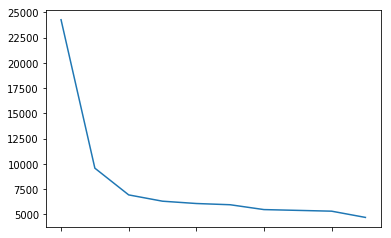

In [16]:
%matplotlib inline
top10.plot()

That doesn't make much sense here, so we use a sub-method of `plot` called `bar()` to create a bar chart.

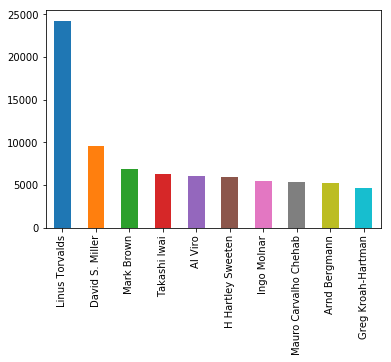

In [17]:
top10.plot.bar()

This data can also be visualized as a pie chart. For this, we call the `pie()` method instead of `bar()`. We can also add a semicolon `;` after the `plot` command to avoid printing the text of the reference. 

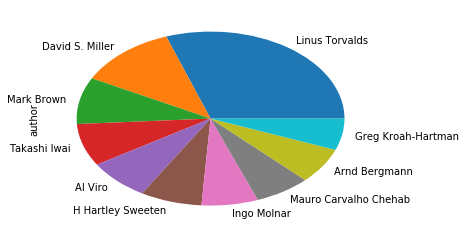

In [18]:
top10.plot.pie();

However, the diagram does not look very nice here.

With the optional styling parameters, we can achieve that we get a nicer graphics. We use
* `figsize=[7,7]` as size
* `title="Top 10 authors"` as title
* `labels=None` to avoid displaying the superfluous label on the left.

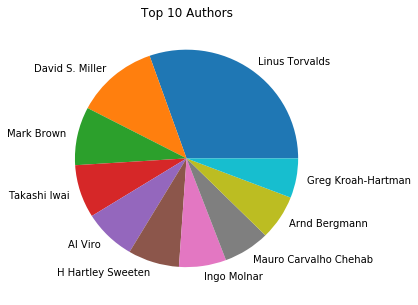

In [19]:
top10.plot.pie(
    figsize=[5,5],
    title="Top 10 Authors",
    label="");

## Working with dates
Now let's look at the timestamp information. We want to find out at what time of day the developers commit.

In [20]:
git_log.timestamp.head()

0    2017-12-31 14:47:43
1    2017-12-31 13:13:56
2    2017-12-31 13:03:05
3    2017-12-31 12:30:34
4    2017-12-31 12:29:02
Name: timestamp, dtype: object

Before we can enter the world of time series processing, we must first convert our column with the dates into the appropriate data type. At the moment our column `timestamp` is still a string, i.e. of textual nature. We can see this by using the helper function `type(<object>)` to display the first entry of the `timestamp` column:

In [21]:
type(git_log.timestamp[0])

str

Of course, Pandas also helps us to convert data types. The function `pd.to_datetime` takes as first parameter a `series` with dates and converts them. The return value is a `Series` with values of the data type `Timestamp`. The conversion works for most textual dates mostly automagically [sic!], because Pandas can handle different date formats. We also write the result back into the same column.

In [22]:
git_log.timestamp = pd.to_datetime(git_log.timestamp)
git_log.head()

,timestamp,author
0,2017-12-31 14:47:43,Linus Torvalds
1,2017-12-31 13:13:56,Linus Torvalds
2,2017-12-31 13:03:05,Linus Torvalds
3,2017-12-31 12:30:34,Linus Torvalds
4,2017-12-31 12:29:02,Linus Torvalds


To check if the conversion was successful, we can check the first value of our converted column `timestamp_local` by calling `type()` again.

In [23]:
type(git_log.timestamp[0])

pandas._libs.tslib.Timestamp

We can now also access individual parts of the date values. For this, we use the `dt` ("datetime") object with its properties like `hour`.

In [24]:
git_log.timestamp.dt.hour.head()

0    14
1    13
2    13
3    12
4    12
Name: timestamp, dtype: int64

Together with the `value_counts()` method that I've already introduced above, we can now count values again after their occurrence. However, it is important that we also set the parameter `sort=False` to avoid sorting according to keep the order of the hours.

In [25]:
commits_per_hour = git_log.timestamp.dt.hour.value_counts(sort=False)
commits_per_hour.head()

0    19533
1    15044
2    10420
3     7000
4     6068
Name: timestamp, dtype: int64

We can display the result by means of a bar chart and thus get an overview of how many commits occured for each hour.

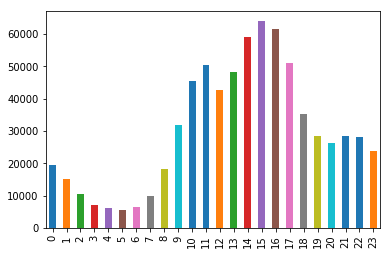

In [26]:
commits_per_hour.plot.bar();

We now additionally label the plot. To do this, we store the return object of the `bar()` function in the variable `ax`. This is an `Axes` object of the underlying plotting library `matplotlib`, through which we can customize additional properties of the plot. We set here

* the title via `set_title("<titel name>")`
* the label of the X-axis with `set_xlabel("<X-axis label>")`
* the label of the Y-axis with `set_ylabel<"Y-axis label>")`

The result is a more meaningful, labeled bar chart.

Text(0,0.5,'Number of Commits')

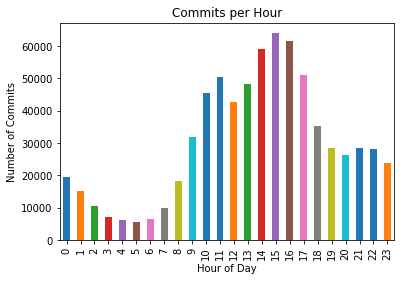

In [27]:
ax = commits_per_hour.plot.bar()
ax.set_title("Commits per Hour")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Commits")

We can also analyze the commits per weekdays. To do this, we use the `weekday` attribute of the datetime attribute `dt`. The values here are 0-based with Monday as the first day of the week. As usual, we count the values using `value_counts` and do not sort the values by size but keep the sorting by weekday.

In [28]:
commits_per_weekday = git_log.timestamp.dt.weekday.value_counts(sort=False)
commits_per_weekday

0    124296
1    131690
2    131019
3    127097
4    117635
5     44877
6     46600
Name: timestamp, dtype: int64

The result in `commits_per_weekday` can be output as a bar chart using `plot.bar()`.

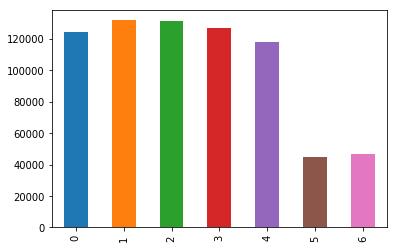

In [29]:
commits_per_weekday.plot.bar();

## Displaying the commit history
In the following, we want to see the progress of the number of commits over the last years by using a `DatetimeIndex` based DataFrame. To do this, we set the `timestamp` column as index using `set_index('<columnname>')`. Furthermore, we select just the `author` column. Thus we work continuously on a pure `Series` instead of a `DataFrame`. 

Side note: The usage of a `Series` is almost similar to a `DataFrame` with regard to the statistical functions. However, a `Series` is not beautifully formatted in a table, which is why I personally prefer using a `DataFrame`.

In [30]:
git_timed = git_log.set_index('timestamp').author
git_timed.head()

timestamp
2017-12-31 14:47:43    Linus Torvalds
2017-12-31 13:13:56    Linus Torvalds
2017-12-31 13:03:05    Linus Torvalds
2017-12-31 12:30:34    Linus Torvalds
2017-12-31 12:29:02    Linus Torvalds
Name: author, dtype: object

Using the `resample("<time unit>")` function of the `DataFrame`, we can now group values according to certain time units such as days (`D`), months (`M`), quarters (`Q`) or years (`A`). We use a `resample("D")` for counting per day. We also specify how the individual values should be combined per time unit. For this, we select the `count()` function to count the number of commits for each day.

In [31]:
commits_per_day = git_timed.resample("D").count()
commits_per_day.head()

timestamp
2005-04-16    199
2005-04-17     30
2005-04-18     73
2005-04-19     28
2005-04-20      8
Freq: D, Name: author, dtype: int64

To show the commit history over the years, we calculate the cumulative sum of all daily entries using `cumsum()`. All values get summed up one after the other.

In [32]:
commits_per_day_cumulative = commits_per_day.cumsum()
commits_per_day_cumulative.head()

timestamp
2005-04-16    199
2005-04-17    229
2005-04-18    302
2005-04-19    330
2005-04-20    338
Freq: D, Name: author, dtype: int64

The result is plotted as a line diagram and the number of commits is shown over the years.

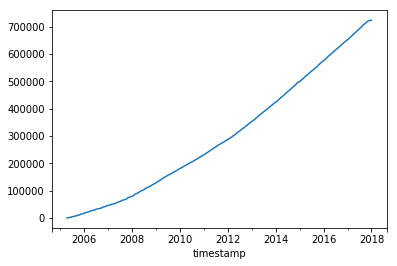

In [33]:
commits_per_day_cumulative.plot()

# The End
OK, that's it for now!

You've learned some basics about Pandas and its usage with software data. This will hopefully get you started in your daily work. Other important topics that are still missing are:

* Reading in complicated or semi-structured data structures
* Merging different data sources with `pd.merge` and `join`
* Grouping similar data using `groupby`
* Transforming data with `pivot_table`

But with the features shown, you are on a good way to become a Software Development Analyst that can leverage Data Science to fix problems in software systems!

If you want to dive deeper into this topic, take a look at my [other blog posts on that topic](http://www.feststelltaste.de/category/software-analytics/). I'm also [offering training for companies](http://markusharrer.de/) who want to fix their problems using data analysis in software development.

I'm looking forward to your comments and feedback!